In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
import os
data_dir = os.path.expanduser("data/cora")

In [2]:
edgelist = pd.read_csv(os.path.join(data_dir, "cora.cites"), sep='\t', header=None, names=["target", "source"])
edgelist["label"] = "cites"
edgelist.sample(frac=1).head(10)
G = nx.from_pandas_edgelist(edgelist, edge_attr="label")
nx.set_node_attributes(G, "paper", "label")

In [3]:
degree = []
counts = list(nx.degree_histogram(G))
for i in range(len(counts)):
    degree.append(i)
log_degree = []
log_counts = []
degree_nonzero = []
counts_nonzero = []
for i in range(len(degree)):
    if (counts[i]):
        degree_nonzero.append(degree[i])
        counts_nonzero.append(counts[i])
        log_degree.append(np.log(degree[i]))
        log_counts.append(np.log(counts[i]))

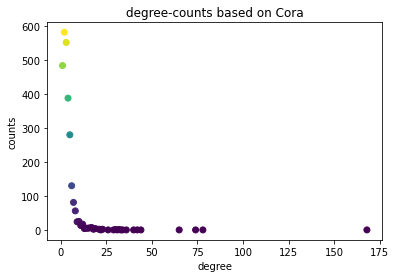

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title("degree-counts based on Cora")
plt.xlabel("degree")
plt.ylabel("counts")
plt.scatter(degree_nonzero, counts_nonzero, c=counts_nonzero)
plt.savefig("degree-counts-c.png")
plt.show()

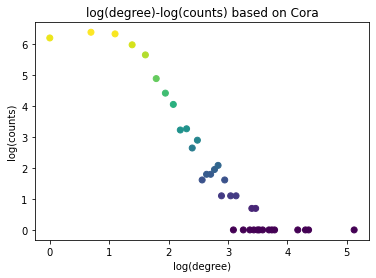

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title("log(degree)-log(counts) based on Cora")
plt.xlabel("log(degree)")
plt.ylabel("log(counts)")
plt.scatter(log_degree, log_counts, c=log_counts)
plt.savefig("log-degree-counts-c.png")
plt.show()